<a href="https://colab.research.google.com/github/israelIsiaka/web_scrapping/blob/main/web_scrapping_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is a simple web scrapping assignment

I will be scrapping From https://www.scrapethissite.com/pages/simple/

After scrapping I will be displaying the countries, captial , population and area.

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Target URL
url = "https://www.scrapethissite.com/pages/simple/"

# Send GET request
response = requests.get(url)
response.raise_for_status()  # Ensure we got a valid response

# Parse HTML
soup = BeautifulSoup(response.text, "html.parser")

# Find all country containers
countries = soup.find_all("div", class_="country")

# Prepare storage
data = []

# Loop through each country block
for country in countries:
    name = country.find("h3", class_="country-name").text.strip()
    capital = country.find("span", class_="country-capital").text.strip()
    population = country.find("span", class_="country-population").text.strip()
    area = country.find("span", class_="country-area").text.strip()

    data.append({
        "Country": name,
        "Capital": capital,
        "Population": population,
        "Area (km²)": area
    })

# Convert to DataFrame
df = pd.DataFrame(data)

# Display first 10 rows
print(df.head(100))

                              Country           Capital Population Area (km²)
0                             Andorra  Andorra la Vella      84000      468.0
1                United Arab Emirates         Abu Dhabi    4975593    82880.0
2                         Afghanistan             Kabul   29121286   647500.0
3                 Antigua and Barbuda        St. John's      86754      443.0
4                            Anguilla        The Valley      13254      102.0
..                                ...               ...        ...        ...
95  Heard Island and McDonald Islands              None          0      412.0
96                           Honduras       Tegucigalpa    7989415   112090.0
97                            Croatia            Zagreb    4491000    56542.0
98                              Haiti    Port-au-Prince    9648924    27750.0
99                            Hungary          Budapest    9982000    93030.0

[100 rows x 4 columns]


In [5]:
print(df.describe())

        Country Capital Population Area (km²)
count       250     250        250        250
unique      250     242        247        246
top     Andorra    None          0       21.0
freq          1       8          4          3


In [10]:
df.groupby('Area (km²)').describe()

Country                                          Capital         \
             count unique                          top freq   count unique   
Area (km²)                                                                   
0.0              1      1  U.S. Minor Outlying Islands    1       1      1   
0.44             1      1                 Vatican City    1       1      1   
1.4E7            1      1                   Antarctica    1       1      1   
1.71E7           1      1                       Russia    1       1      1   
1.95             1      1                       Monaco    1       1      1   
...            ...    ...                          ...  ...     ...    ...   
945087.0         1      1                     Tanzania    1       1      1   
9596960.0        1      1                        China    1       1      1   
9629091.0        1      1                United States    1       1      1   
98480.0          1      1                  South Korea    1       1      1   
9984670.0        1      1                       Canada    1       1      1   

                              Population                          
                     top freq      count unique         top freq  
Area (km²)                                                        
0.0                 None    1          1      1           0    1  
0.44        Vatican City    1          1      1         921    1  
1.4E7               None    1          1      1           0    1  
1.71E7            Moscow    1          1      1   140702000    1  
1.95              Monaco    1          1      1       32965    1  
...                  ...  ...        ...    ...         ...  ...  
945087.0          Dodoma    1          1      1    41892895    1  
9596960.0        Beijing    1          1      1  1330044000    1  
9629091.0     Washington    1          1      1   310232863    1  
98480.0            Seoul    1          1      1    48422644    1  
9984670.0         Ottawa    1          1      1    33679000    1  

[246 rows x 12 columns]

In [38]:
df.groupby('Population').describe()

Area (km²)                                                   \
                count        mean           std        min         25%   
Population                                                               
0                 4.0  3500115.25  6.999923e+06        0.0       36.75   
30                1.0     3903.00           NaN     3903.0     3903.00   
46                1.0       47.00           NaN       47.0       47.00   
140               1.0     7829.00           NaN     7829.0     7829.00   
628               1.0       14.00           NaN       14.0       14.00   
...               ...         ...           ...        ...         ...   
201103330         1.0  8511965.00           NaN  8511965.0  8511965.00   
242968342         1.0  1919440.00           NaN  1919440.0  1919440.00   
310232863         1.0  9629091.00           NaN  9629091.0  9629091.00   
1173108018        1.0  3287590.00           NaN  3287590.0  3287590.00   
1330044000        1.0  9596960.00           NaN  9596960.0  9596960.00   

                                              
                  50%        75%         max  
Population                                    
0               230.5  3500309.0  14000000.0  
30             3903.0     3903.0      3903.0  
46               47.0       47.0        47.0  
140            7829.0     7829.0      7829.0  
628              14.0       14.0        14.0  
...               ...        ...         ...  
201103330   8511965.0  8511965.0   8511965.0  
242968342   1919440.0  1919440.0   1919440.0  
310232863   9629091.0  9629091.0   9629091.0  
1173108018  3287590.0  3287590.0   3287590.0  
1330044000  9596960.0  9596960.0   9596960.0  

[247 rows x 8 columns]

In [37]:
df.Population.min()

0

In [19]:
# Convert 'Population' to numeric, coercing errors
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')

# Find the index of the maximum population
max_population_index = df['Population'].idxmax()

# Find the index of the mimumm population
min_population_index = df['Population'].idxmin()

# Get the country and its population with the maximum population
country_with_max_population = df.loc[max_population_index, 'Country']
max_population = df.loc[max_population_index, 'Population']

# Get the country and its population with the mimimum population
country_with_min_population = df.loc[min_population_index, 'Country']
min_population = df.loc[min_population_index, 'Population']


print(f"The country with the maximum population is {country_with_max_population} with a population of {max_population}")

print(f"The country with the minimum population is {country_with_min_population} with a population of {min_population}")

The country with the maximum population is China with a population of 1330044000
The country with the minimum population is Antarctica with a population of 0


In [36]:
# Sort by population in descending order and select the top 10
top_10_population = df.nlargest(10, 'Population')

# Sort by area in descending order and select the top 10
top_10_area = df.nlargest(10, 'Area (km²)')

# Combine the two dataframes for side-by-side display
combined_top_10 = pd.concat([top_10_population[['Country', 'Population']].reset_index(drop=True),
                            top_10_area[['Country', 'Area (km²)']].reset_index(drop=True)], axis=1)

print("Top 10 countries by Population and Area (Side-by-Side):")
display(combined_top_10)

Top 10 countries by Population and Area (Side-by-Side):


,Country,Population,Country,Area (km²)
0,China,1330044000,Russia,17100000.0
1,India,1173108018,Antarctica,14000000.0
2,United States,310232863,Canada,9984670.0
3,Indonesia,242968342,United States,9629091.0
4,Brazil,201103330,China,9596960.0
5,Pakistan,184404791,Brazil,8511965.0
6,Bangladesh,156118464,Australia,7686850.0
7,Nigeria,154000000,India,3287590.0
8,Russia,140702000,Argentina,2766890.0
9,Japan,127288000,Kazakhstan,2717300.0


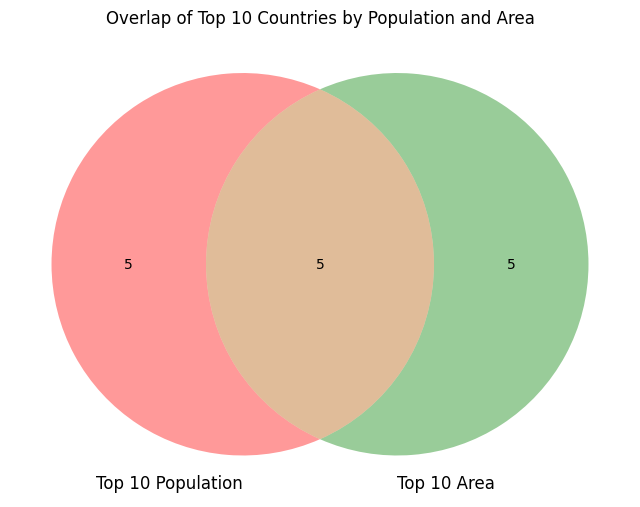

Countries in both Top 10s:
['China', 'India', 'United States', 'Brazil', 'Russia']

Countries in Top 10 Population only:
['Indonesia', 'Pakistan', 'Bangladesh', 'Nigeria', 'Japan']

Countries in Top 10 Area only:
['Antarctica', 'Canada', 'Australia', 'Argentina', 'Kazakhstan']


In [35]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Find countries that are in both top 10 population and top 10 area
common_countries = pd.merge(top_10_population, top_10_area, on='Country')['Country']

# Get the unique countries in each list
top_10_pop_only = top_10_population[~top_10_population['Country'].isin(common_countries)]['Country']
top_10_area_only = top_10_area[~top_10_area['Country'].isin(common_countries)]['Country']

# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn2(subsets=(len(top_10_pop_only), len(top_10_area_only), len(common_countries)),
      set_labels=('Top 10 Population', 'Top 10 Area'))
plt.title('Overlap of Top 10 Countries by Population and Area')
plt.show()

print("Countries in both Top 10s:")
print(list(common_countries))

print("\nCountries in Top 10 Population only:")
print(list(top_10_pop_only))

print("\nCountries in Top 10 Area only:")
print(list(top_10_area_only))

From the diagram above  it can be seen that there is a relationship between counties with high populationa and large and large land area Countries in both Top 10s:
1 . China
2. India
 'United States', 'Brazil', 'Russia']

From the Venn diagram above, we can see the relationship between the top 10 countries by population and the top 10 countries by area. The diagram shows the number of countries that are in both lists, only in the top 10 population list, and only in the top 10 area list.

The countries that appear in both the Top 10 Population and Top 10 Area lists are:
1. China
2. India
3. United States
4. Brazil
5. Russia

This visualization helps illustrate the degree of overlap between having a large population and a large land area among the top countries.